In [1]:
%matplotlib inline

In [33]:
import pickle
import random
from collections import defaultdict
from itertools import product

import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt

In [3]:
kernels_names = [
    'Katz', 'logKatz',
    'For', 'logFor',
    'Comm', 'logComm',
    'Heat', 'logHeat',
    'NHeat', 'logNHeat',
    'SCT', 'SCCT',
    'RSP', 'FE',
    'PPR', 'logPPR',
    'ModifPPR', 'logModifPPR',
    'HeatPR', 'logHeatPR',
    'DF', 'logDF',
    'Abs', 'logAbs',
    'SP-CT'
]

shuffle = lambda x: sorted(x, key=lambda k: random.random())

def dict_argmax(dct, score_key):
    best_key = list(dct.keys())[0]
    best_val = dct[best_key]
    for k, v in dct.items():
        if v[score_key] > best_val[score_key]:
            best_key, best_val = k, v
    return best_key, best_val

CACHE_ROOT = '../../cache/cache'

def calc_avranks(results):  # {dataset: {classifier: accuracy}}
    ranks = defaultdict(list)
    for dataset, classifier_accuracy in results.items():
        if type(dataset) == tuple:
            dataset = '_'.join([str(x) for x in dataset])
        classifiers, accuracies = zip(*list(classifier_accuracy.items()))
        for classifier, rank in zip(classifiers, rankdata(accuracies)):
            ranks[classifier].append(rank)
    ranks = {k: np.mean(v) for k, v in sorted(ranks.items(), key=lambda x: x[0])}
    return list(ranks.values()), list(ranks.keys()), len(results)


# Analyze results of SBM – Stochastic Block Model

In [4]:
columns = [
    (100, 2, 0.2, 0.05),
    (100, 2, 0.3, 0.05),
    (100, 2, 0.3, 0.1),
    (100, 2, 0.3, 0.15),
    (102, 3, 0.3, 0.1),
    (100, 4, 0.3, 0.1),
    (100, 4, 0.3, 0.15),
    (200, 2, 0.3, 0.05),
    (200, 2, 0.3, 0.1),
    (200, 2, 0.3, 0.15),
    (201, 3, 0.3, 0.1),
    (200, 4, 0.3, 0.1),
    (200, 4, 0.3, 0.15)
]

def column2str(column):
    n, k, p_in, p_out = column
    return f'{n}_{k}_{p_in:.1f}_{p_out:.2f}'

sbm_datasets = [column2str(x) for x in columns]

In [10]:
with open(f'{CACHE_ROOT}/sbm_inits_bestparam_byari_individual.pkl', 'rb') as f:
    sbm_results = pickle.load(f)  # {(dataset, kernel_name, graph_idx): {scorename_initname: best_ari}}
with open(f'{CACHE_ROOT}/sbm_modularity.pkl', 'rb') as f:
    sbm_modularity = pickle.load(f)  # {(dataset, graph_idx): modularity}

In [15]:
sbm_results_m3_dka = defaultdict(lambda: defaultdict(list)) # {dataset, {kernel_name: [best_ari_for_graph]}}
for (dataset, kernel_name, graph_idx), si_ari in sbm_results.items():
    sbm_results_m3_dka[dataset][kernel_name].append(si_ari['modularity_any3'])
for dataset, kernel_name in product(sbm_datasets, kernels_names):  # {dataset, {kernel_name: mean_bestari}}
    sbm_results_m3_dka[dataset][kernel_name] = np.mean(sbm_results_m3_dka[dataset][kernel_name])

sbm_meanari = {k: np.mean(list(v.values())) for k, v in sbm_results_m3_dka.items()}  # {dataset, mean_mean_bestari}
for dataset, meanari in sorted(list(dataset_meanari.items()), key=lambda x: x[1]):
    print(f'{dataset}: {meanari:.2f}')

100_4_0.3_0.15: 0.22
200_4_0.3_0.15: 0.36
100_4_0.3_0.10: 0.52
100_2_0.3_0.15: 0.76
102_3_0.3_0.10: 0.78
200_4_0.3_0.10: 0.80
200_2_0.3_0.15: 0.86
201_3_0.3_0.10: 0.88
100_2_0.3_0.10: 0.93
100_2_0.2_0.05: 0.93
200_2_0.3_0.10: 0.95
100_2_0.3_0.05: 1.00
200_2_0.3_0.05: 1.00


In [19]:
sbm_meanmodularity = dict()
for dataset in sbm_datasets:
    sbm_meanmodularity[dataset] = np.mean([sbm_modularity[(dataset, graph_idx)] for graph_idx in range(100)])
for dataset, modularity in sorted(list(sbm_meanmodularity.items()), key=lambda x: x[1]):
    print(f'{dataset}: {modularity:.2f}')

100_4_0.3_0.15: 0.14
200_4_0.3_0.15: 0.14
100_2_0.3_0.15: 0.16
200_2_0.3_0.15: 0.16
100_4_0.3_0.10: 0.24
200_4_0.3_0.10: 0.25
100_2_0.3_0.10: 0.25
200_2_0.3_0.10: 0.25
102_3_0.3_0.10: 0.26
201_3_0.3_0.10: 0.26
100_2_0.2_0.05: 0.29
100_2_0.3_0.05: 0.35
200_2_0.3_0.05: 0.36


In [12]:
datasets_datasets = [
    'cora_DB', 'cora_EC', 'cora_HA', 'cora_HCI', 'cora_IR', 'cora_Net',
    'dolphins',
    'eu-core',
    'eurosis',
    'football',
    'karate',
    'news_2cl_1', 'news_2cl_2', 'news_2cl_3',
    'news_3cl_1', 'news_3cl_2', 'news_3cl_3',
    'news_5cl_1', 'news_5cl_2', 'news_5cl_3',
    'polblogs',
    'polbooks',
    'sp_school_day_1', 'sp_school_day_2'
]

In [13]:
with open(f'{CACHE_ROOT}/datasets_inits_bestparam_byari_individual.pkl', 'rb') as f:
    datasets_results = pickle.load(f)  # {(dataset, kernel_name, graph_idx): {scorename_initname: best_ari}}
with open(f'{CACHE_ROOT}/datasets_modularity.pkl', 'rb') as f:
    datasets_modularity = pickle.load(f)  # {(dataset, graph_idx): modularity}

In [29]:
datasets_results_m3_dka = defaultdict(lambda: defaultdict(list)) # {dataset, {kernel_name: [best_ari_for_graph]}}
for (dataset, kernel_name, graph_idx), si_ari in datasets_results.items():
    datasets_results_m3_dka[dataset][kernel_name].append(si_ari['modularity_any3'])
for dataset, kernel_name in product(datasets_datasets, kernels_names):  # {dataset, {kernel_name: best_ari}}
    datasets_results_m3_dka[dataset][kernel_name] = np.mean(datasets_results_m3_dka[dataset][kernel_name])

datasets_meanari = {k: np.mean(list(v.values())) for k, v in datasets_results_m3_dka.items()}  # {dataset, mean_mean_bestari}
for dataset, meanari in sorted(list(datasets_meanari.items()), key=lambda x: x[1]):
    print(f'{dataset}: {meanari:.2f}')

cora_Net: 0.18
cora_DB: 0.18
cora_EC: 0.27
cora_IR: 0.29
eu-core: 0.34
cora_HA: 0.38
news_5cl_2: 0.48
news_5cl_3: 0.48
cora_HCI: 0.51
news_5cl_1: 0.55
news_2cl_2: 0.68
news_3cl_1: 0.69
polbooks: 0.69
news_3cl_3: 0.69
news_3cl_2: 0.71
sp_school_day_1: 0.72
polblogs: 0.73
sp_school_day_2: 0.74
eurosis: 0.74
news_2cl_1: 0.80
news_2cl_3: 0.81
football: 0.87
dolphins: 0.93
karate: 1.00


In [25]:
datasets_meanmodularity = datasets_modularity
for dataset, modularity in sorted(list(datasets_meanmodularity.items()), key=lambda x: x[1]):
    print(f'{dataset}: {modularity:.2f}')

cora_EC: 0.19
news_2cl_2: 0.27
news_2cl_1: 0.28
sp_school_day_1: 0.29
news_2cl_3: 0.31
news_5cl_3: 0.31
eu-core: 0.31
news_5cl_2: 0.32
sp_school_day_2: 0.32
news_5cl_1: 0.33
cora_Net: 0.35
news_3cl_2: 0.35
news_3cl_3: 0.36
news_3cl_1: 0.36
karate: 0.37
dolphins: 0.37
cora_IR: 0.38
polblogs: 0.41
polbooks: 0.41
cora_DB: 0.43
cora_HCI: 0.53
football: 0.55
cora_HA: 0.61
eurosis: 0.70


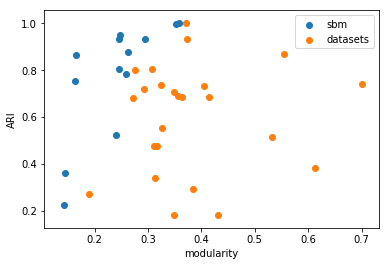

In [40]:
# draw ari-modularity dependency

x, y = [], []
for dataset in sbm_datasets:
    x.append(sbm_meanmodularity[dataset])
    y.append(sbm_meanari[dataset])
plt.scatter(x, y, label='sbm')

x, y = [], []
for dataset in datasets_datasets:
    x.append(datasets_meanmodularity[dataset])
    y.append(datasets_meanari[dataset])
plt.scatter(x, y, label='datasets')

plt.xlabel('modularity')
plt.ylabel('ARI')
plt.legend();